Predicción del desgaste de vehículos
🛠️ Misión: Predicción del Desgaste de Vehículos Militares

Como analista de datos en una base militar, tu tarea es predecir el nivel de desgaste de vehículos en función de las horas de uso.

Esta herramienta será clave para evitar fallos operativos y optimizar los mantenimientos preventivos.

Debes implementar un sistema basado en regresión lineal que:

Genere registros de entrenamiento con la clase VehicleDataGenerator.

Represente cada registro con la clase VehicleRecord, que almacene las horas de uso y el nivel de desgaste.

Entrene un modelo con la clase VehicleWearRegressor para aprender la relación entre las horas y el desgaste.

Visualice los resultados y permita hacer predicciones con la clase principal VehicleWearPredictionExample.

Detalles técnicos:

Usa NumPy, Pandas, Matplotlib y LinearRegression de scikit-learn.

Los datos sintéticos deben simular que el desgaste aumenta con las horas de uso, con algo de ruido.

El modelo debe permitir predecir el nivel de desgaste de un nuevo vehículo dado sus horas de servicio.

Visualiza los datos reales y la línea de regresión, y marca en el gráfico la predicción del nuevo vehículo.

Organiza la solución en clases, siguiendo estos nombres:




Ejemplo de uso

example = VehicleWearPredictionExample()
example.run()


Salida esperada

⏱ Horas de uso estimadas: 250
⚙️ Nivel de desgaste estimado: 53.75%


⏱ Horas de uso estimadas: 250
⚙️ Nivel de desgaste estimado: 54.52%


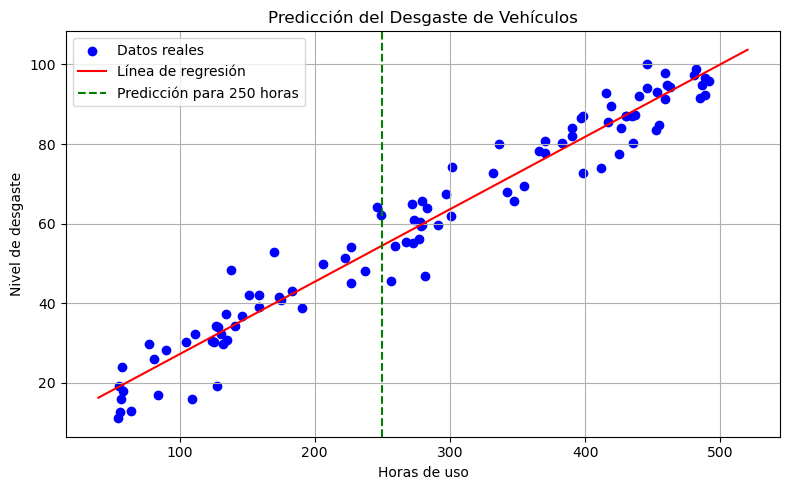

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Clase 1: Registro de Vehículo
class VehicleRecord:
    def __init__(self, hours_used, wear_level):
        self.hours_used = hours_used
        self.wear_level = wear_level
    
    def to_vector(self):
        return [self.hours_used]

# Clase 2: Generador de Datos de Vehículos
class VehicleDataGenerator:
    def __init__(self, num_samples=100):
        self.num_samples = num_samples
    
    def generate(self):
        # Generar horas de uso aleatorias entre 50 y 500
        hours = np.random.uniform(50, 500, self.num_samples)
        # Generar desgaste (relación lineal con algo de ruido)
        wear = 10 + 0.18 * hours + np.random.normal(0, 5, self.num_samples)
        wear = np.clip(wear, 0, 100)  # Limitar el desgaste entre 0 y 100
        data = [VehicleRecord(h, w) for h, w in zip(hours, wear)]
        return data

# Clase 3: Regresor de Desgaste de Vehículos
class VehicleWearRegressor:
    def __init__(self):
        self.model = LinearRegression()
    
    def fit(self, records):
        # Convertir los registros en vectores para el modelo
        X = np.array([r.to_vector() for r in records])
        y = np.array([r.wear_level for r in records])
        self.model.fit(X, y)
    
    def predict(self, hours):
        return self.model.predict([[hours]])[0]
    
    def get_model(self):
        return self.model

# Clase 4: Ejemplo de Predicción del Desgaste de Vehículos
class VehicleWearPredictionExample:
    def run(self):
        # Generar datos de entrenamiento
        generator = VehicleDataGenerator(100)
        records = generator.generate()
        
        # Entrenar el modelo de regresión
        regressor = VehicleWearRegressor()
        regressor.fit(records)
        
        # Realizar una predicción para 250 horas de uso
        test_hours = 250
        prediction = regressor.predict(test_hours)
        print(f"⏱ Horas de uso estimadas: {test_hours}")
        print(f"⚙️ Nivel de desgaste estimado: {prediction:.2f}%")
        
        # Organizar los datos en un DataFrame de Pandas
        df = pd.DataFrame({
            "Horas de uso": [r.hours_used for r in records],
            "Nivel de desgaste": [r.wear_level for r in records]
        })
        
        # Visualizar los resultados
        plt.figure(figsize=(8, 5))
        plt.scatter(df["Horas de uso"], df["Nivel de desgaste"], color='blue', label='Datos reales')
        
        # Graficar la línea de regresión
        x_line = np.linspace(40, 520, 100).reshape(-1, 1)
        y_line = regressor.get_model().predict(x_line)
        plt.plot(x_line, y_line, color='red', label='Línea de regresión')
        
        # Marcar la predicción para el vehículo con 250 horas
        plt.axvline(test_hours, color='green', linestyle='--', label=f'Predicción para {test_hours} horas')
        
        # Configuración del gráfico
        plt.title('Predicción del Desgaste de Vehículos')
        plt.xlabel('Horas de uso')
        plt.ylabel('Nivel de desgaste')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Ejemplo de uso
example = VehicleWearPredictionExample()
example.run()